# Methods

This section introduces the methods that will be examined, and characterizes them with a series of simulations.

## Overview

Methods that are included in this project:

- 11-SpectralFitting: measuring aperiodic parameters by fitting the power spectrum
    - methods: line fitting, robust line fitting, spectral parameterization
- 12-IRASA: the irregular resampling and auto-spectral analysis algorithm
    - methods: IRASA
- 13-AutoCorrelation: auto-correlation measures
    - methods: auto correlation
- 14-Fluctuations: includes the Hurst exponent and 
    - methods: Hurst exponent, detrended fluctuation analysis (DFA)
- 15-Complexity: time series complexity measures, including 
    - methods: Hjorth parameters, fractal measures: Higuchi, Katz, Petrosian
- 16-Information: information
    - sample entropy, permutation entropy, approximate entropy, spectral entropy

## Code Approach

Here, we will briefly introduce the general strategy and code used to run the simulations. 

### run_sims

The overarching function used to run simulations in this section is `run_sims`. 

This approach allows for:
- defining a procedure to simulate time series
- defining a measure of interest to apply to the simulated time series
- applying this measure across simulated instances, sweeping across parameter ranges

In [1]:
# Import the `run_sims` function from the custom code folder
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from apm.run import run_sims

In [2]:
# Check the documentation for `run_sims`
print(run_sims.__doc__)

Compute a measure of interest across a set of simulations.

    Parameters
    ----------
    sim_func : callable
        A function to create the simulations from.
    sim_params : dict
        Input arguments for `sim_func`.
    measure_func : callable
        A measure function to apply to the simulated data.
    measure_params : dict
        Input arguments for `measure_func`.
    values : list or 1d array
        A parameter to step across and re-run measure calculations for.
    update : {'update_exp', 'update_freq', 'update_pow', 'update_comb_exp'} or callable
        Specifies which parameter to update in simulation parameters.
    n_sims : int, optional, default: 10
        The number of iterations to simulate and calculate measures, per value.

    Returns
    -------
    measures : 1d array
        The results of the measures applied to the set of simulations.

    Notes
    -----
    The mean measure across `n_sims` of simulations if computed and returned.
    


Next, we can run an example of using `run_sims`.

To do so, we will define an example analysis to apply a measure of interest (here, variance) across some simulations of 1/f (powerlaw) data.

In [3]:
import numpy as np

from neurodsp.sim import sim_powerlaw

from apm.sim.settings import SIM_PARAMS_AP

In [4]:
# Define settings for simulation
exponents = [1, 1.5, 2]
n_sims = 2

In [5]:
# Run simulations across 
out = run_sims(sim_powerlaw, SIM_PARAMS_AP, np.var, {}, 
               exponents, 'update_exp', n_sims=n_sims)

### Evaluating Results

After computing the measures, we can examine the results, across different simulation parameters.

Where possible, we also evaluate the accuracy of the computed measures given the expected answer based on the simulated parameters.

Note that in our example case, computing the variance, the simulated signals are normalized such that they all have a variance of 1. 

In [6]:
# Check output values of the simulations
out

[1.0, 1.0, 1.0]

In [7]:
# Import a plot function to visualize the computed measures
from apm.plts import plot_lines

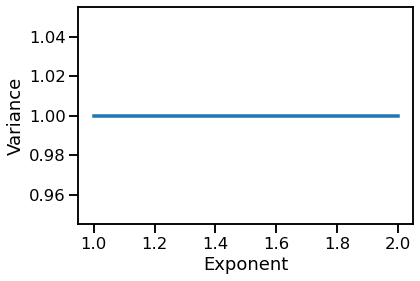

In [8]:
# Plot the computed measures across the different simulation parameters
plot_lines(exponents, out, xlabel='Exponent', ylabel='Variance')